Econometría Aplicada. Lección 6
===============================

**Author:** Marcos Bujosa



<div class="abstract" id="orga8a8424">
<p>
En esta lección veremos algunas herramientas estadísticas.
 y usaré la librería <code>tfarima</code> de
José Luis Gallego siempre que pueda.
</p>

</div>



$
\newcommand{\lag}{\mathsf{B}}
\newcommand{\Sec}[1]{\boldsymbol{#1}}
\newcommand{\Pol}[1]{\boldsymbol{#1}}
$



#### Carga de algunas librerías de R



Primero cargamos la librería `tfarima` (Repositorio Cran:
[https://cran.r-project.org/web/packages/tfarima/index.html](https://cran.r-project.org/web/packages/tfarima/index.html);
repositorio GitHub: [https://github.com/gallegoj/tfarima](https://github.com/gallegoj/tfarima))



In [1]:
library(tfarima)      # librería de José Luis Gallego para Time Series
library(readr)        # para leer ficheros CSV
library(ggplot2)      # para el scatterplot (alternaticamente library(tidyverse))
library(ggfortify)    # para pintar series temporales
library(jtools)       # para representación resultados estimación
library(zoo)          # para generar objetos ts (time series)

y además fijamos los parámetros por defecto para las figuras en `png`
del notebook



In [1]:
# fijamos el tamaño de las figuras que se generan en el notebook
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)

## Función de autocovarianzas y función de autocorrelación (ACF)



Ya hemos visto que si un proceso estocásticos es estacionario, la
covarianza entre $X_t$ y $X_{t+k}$ no depende de $t$; tan solo depende
de la distancia temporal $k$ entre ambas variables y que

-   La secuencia $\boldsymbol{\gamma}=(\gamma_k\mid k\in\mathbb{Z})$ se denomina *función de
    autocovarianzas*

-   La secuencia $\boldsymbol{\rho}=(\rho_k\mid k\in\mathbb{Z})$ donde    
    $$\rho_k=\frac{Cov(X_t,X_{t-k})}{\sqrt{Var(X_t)Var(X_{t-k})}}=\frac{\gamma_k}{\gamma_0} $$
    
    se denomina *función de autocorrelación* (ACF).



Veamos otra secuencia que también describe la relación entre distintas
variables del proceso.



## Función de autocorrelación parcial  (PACF)



La *correlación parcial* entre dos variables $X_t$ y $X_{t-k}$ de un
proceso estacionario $\boldsymbol{X}$ mide su correlación una vez
descontado el efecto de las variables $X_{t-1},\ldots X_{t-(k-1)}$ que
median entre ambas.
$$X_t,\ \overbrace{X_{t-1},\ldots X_{t-(k-1)},}\ X_{t-k}$$

Si denotamos con $\widehat{X_t}$ y $\widehat{X_{t-k}}$ los ajustes de
las respectivas regresiones de $X_t$ y $X_{t-k}$ sobre $X_{t-1},\ldots
X_{t-(k-1)};\;$ la *correlación parcial* entre $X_t$ y $X_{t+k}$ es la
correlación entre los residuos de sendas regresiones:
$$Coor\Big((X_t-\widehat{X_t}),\ (X_{t-k}-\widehat{X_{t-k}})\Big)$$



En un proceso débilmente estacionario las correlaciones parciales solo
dependen de la distancia $k$, lo que permite definir la siguiente
secuencia.

**Función de autocorrelación parcial** (PACF) de un proceso estacionario
$\boldsymbol{X}$ es la siguiente secuencia
$\boldsymbol{\pi}=(\pi_k\mid k\in\mathbb{Z}),\;$ que es
simétrica pues
$\pi_{-k}=\pi_k$:
$$\begin{cases}
\pi_0 &=1\\\\
\pi_1 &=Corr(X_t,\ X_{t-1})=\rho_1=\frac{\gamma_1}{\gamma_0}\\\\
\pi_k &=Corr\Big((X_t-\widehat{X_t}),\ (X_{t-k}-\widehat{X_{t-k}})\Big)
\end{cases},$$
donde $\widehat{X_t}$ y $\widehat{X_{t-k}}$ son los ajustes de las
respectivas regresiones de $X_t$ y $X_{t-k}$ sobre 
$X_{t-1},\ldots X_{t-(k-1)}$.



La magnitud de la correlación parcial $\;\pi_k\;$ refleja la mejora en
la predicción de $\widehat{X_t}$ si en lugar de usar una combinación
lineal con solo los $k-1$ primeros retardos,
$\widehat{X_t}=\widehat{\alpha_0}+\sum_{j=1}^{k-1}\widehat{\alpha_j}
X_{t-j}$, empleáramos $k$ retardos (i.e., un retardo más).



Hay una correspondencia uno-a-uno entre la función de autocovarianzas
$\boldsymbol{\gamma}$ y la PACF $\boldsymbol{\pi}$. 

Es decir, es posible reconstruir una de las secuencias a partir de la
otra. Véase *Pourahmadi, M. (2001, capítulo 7)*

Consecuentemente, la PACF $\boldsymbol{\pi}$ puede verse como una
reparametrización de la función de autocovarianzas
$\boldsymbol{\gamma}$.

Veamos otra transformación de $\boldsymbol{\gamma}$ que también
arrojará luz sobre las propiedades de un proceso estocástico.



## Densidad espectral



Para un proceso estocástico $\boldsymbol{X}$ con función de
autocovarianzas $\boldsymbol{\gamma}\in\ell^1$, es decir, con función
de autocovarianzas absolutamente sumable,
$$\sum_{h\in\mathbb{Z}}|\gamma_h|<\infty,$$ entonces definimos la
*densidad espectral* de $\boldsymbol{X}$ como $$f(\omega)
\quad=\quad\frac{1}{2\pi}\sum_{h\in\mathbb{Z}}\gamma_h e^{-i h\omega}
\quad=\quad\frac{1}{2\pi}\sum_{h\geq0}\gamma_h \cos(h\omega),\qquad
\omega\in[-\pi,\pi].$$



La *densidad espectral* $f(\omega)$ satisface las siguientes
propiedades:

1.  $f(\omega)=f(-\omega)$
2.  $f(\omega)\geq0$
3.  $\int_{-\pi}^\pi f(\omega)d\omega<\infty$



Es más, desde la densidad espectral se pueden calcular las covarianzas
$$\gamma_h=\int_{-\pi}^\pi f(\omega)e^{-i h\omega}d\omega;\quad
h\in\mathbb{Z}$$



Consecuentemente, para $h=0$
$$\sigma^2=\gamma_0=\int_{-\pi}^\pi f(\omega)d\omega.$$

Por tanto podemos interpretar la densidad espectral como una
descomposición de la varianza en distintas frecuencias.



La ACF, la PACF y la densidad espectral son funciones que solo
dependen de los dos primeros momentos de la distribución.

Su estimación y posterior análisis son la herramienta fundamental para
elegir un modelo ARMA para una serie temporal *\`\`estacionaria''*.

Para entenderlo debemos ver cómo son estas funciones en algunos
modelos lineales concretos.



## ACF, PACF y densidad espectral de algunos modelos lineales



#+attr_org: :width 1200 :height 800


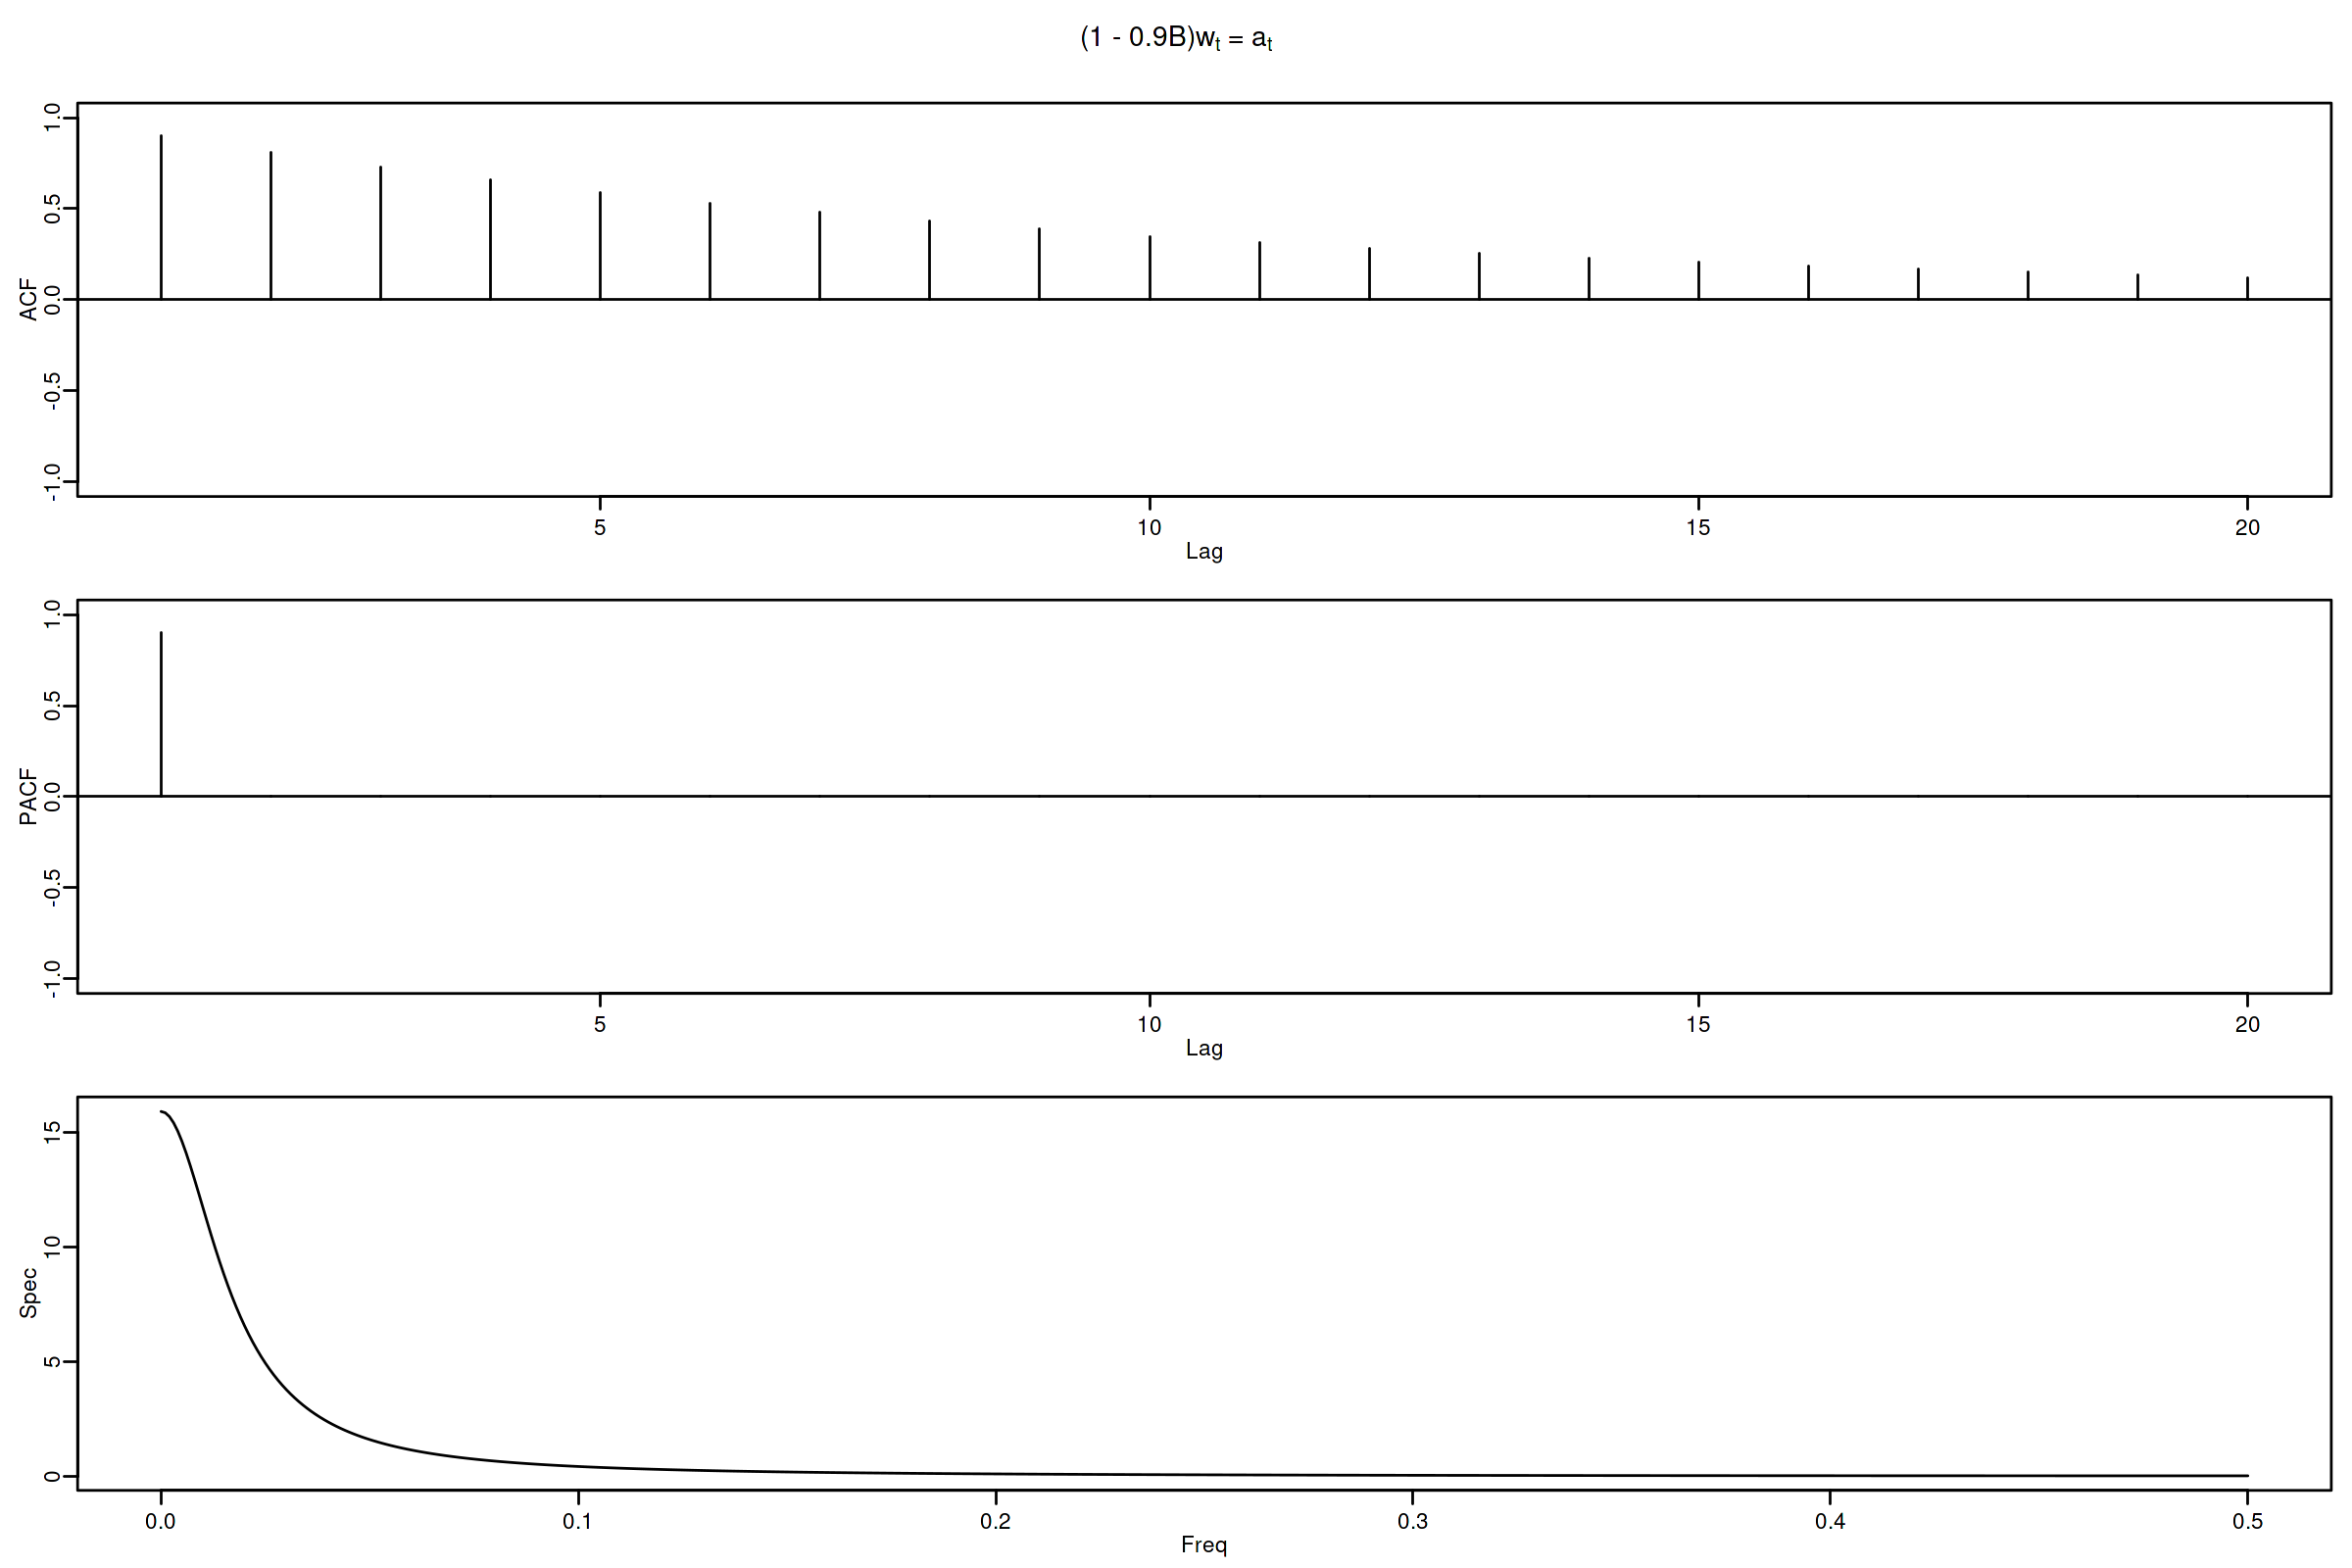

In [1]:
ar0p <- um(ar = "(1 - 0B)")
ar1p <- um(ar = "(1 - 0.9B)")
ar1n <- um(ar = "(1 + 0.9B)")
ma1p <- um(ma = "(1 - 0.9B)")
ma1n <- um(ma = "(1 + 0.9B)")
ar2c <- um(ar = "(1 - 1.52B + 0.8B^2)")
#display(list(ar1p, ar1n, ma1p, ma1n, ar2c), lag.max = 20)
display(list(ar1p), lag.max = 20)

## La especificación del modelo se escoge según las características de los datos.



¿Es la serie 

-   "***estacionaria en media***"
    -   (y si lo es, ¿cuál es su media?)
    -   (y si no lo es, ¿cómo cambia o evoluciona su media?)
-   "***estacionaria en varianza***" (*homocedástica*)
    -   (y si lo es, ¿cuál es su varianza?)
    -   (y si es *heterocedástica*, ¿cómo cambia o evoluciona su varianza?)?

¿Están sus valores correlados con su historia pasada (autocorrelados)?

¿Están correlados con los valores presentes o pasados de otras series?

Veamos algunas herramientas estadísticas para poder desvelar estas
características.



## Herramientas para desvelar propiedades de una serie temporal



### Análisis gráfico



#### Gráfico de la serie temporal



Representa sus valores en el eje vertical ($y$) frente a una escala
temporal en el horizontal ($x$). Es útil para detectar visualmente:

-   tendencias y/o estacionalidad
-   cambios de variabilidad
-   valores atípicos (*outliers*)
    -   el 95% aprox. de una muestra de valores generados por una
        distribución normal debería estar comprendido entre
        $\mu\pm2\sigma$
    -   la probabilidad de que una variable normal genere un valor fuera
        de las bandas de $\mu\pm3\sigma$ es $0.0023$
        
        ([véase gráfico IBEX 35](./img/lecc05/IBEX35.png))

En es importante escalar y rotular adecuadamente los ejes y asegurar
la comparabilidad entre series y gráficos distintos (si los hubiere).



#### Gráfico rango-media



Cambios de variabilidad de una serie pueden evidenciarse en su gráfico
temporal.

Pero también suelen verse bien en un gráfico rango-media, donde se
representa:

-   **en el eje $x$:** un indicador del nivel de la serie calculado para
    distintas submuestras no solapadas (normalmente la media).
-   **en el eje $y$:** un indicador de la dispersión de la serie
    calculado para las mismas submuestras (normalmente el rango.)



Veamos el gráfico de la serie de pasajeros de líneas aéreas junto a su
gráfico de rango media:



In [1]:
Z <- AirPassengers
ide(Z, graphs = c("plot", "rm"), main="Pasajeros de líneas (aéreas en miles) y gráfico rango-media")

![img](./img/lecc06/rango-mediaAirPass.png)



El gráfico de rango media a veces se acompaña de una regresión de la
dispersión sobre los niveles para medir la relación nivel-dispersión.



### Determinación del orden de integración



Decidir adecuadamente el orden de integración es crucial en el
análisis de series temporales.

Las herramientas utilizadas para tomar la decisión son 

-   el análisis gráfico
-   los contrastes formales



#### Análisis gráfico



In [1]:
options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 200)
ide(PoblacionAustralia_ts,
    graphs = c("plot"),
    transf = list(list(bc = F), list(bc = F, d = 1), list(bc = F, d = 2)),
    main="Población australiana, primera diferencia y segunda diferencia" )

![img](./img/lecc06/diferenciasPoblacion.png)



La serie de población $\boldsymbol{y}$ tiene una clara tendencia
creciente (primer gráfico), que desaparece al tomar una diferencia
ordinaria, $$\nabla\boldsymbol{y}=(1-\mathsf{B})*\boldsymbol{y}$$
(segundo gráfico). Bastar con tomar una primera diferencia de la serie
de población para obtener una nueva serie que se asemeja a la
realización de un proceso estacionario.

No obstante, ¿qué pasa si tomamos una segunda diferencia ordinaria?
$$\nabla\nabla\boldsymbol{y}=\nabla^2\boldsymbol{y}=(1-\mathsf{B})^2*\boldsymbol{y}$$
(segundo gráfico). Pues que la serie obtenida también es estacionaria,
pero ojo, es un grave error tomar más diferencias de las necesarias al
modelizar los datos. Se debe tomar el mínimo número de
transformaciones que arrojen una serie \`\`estacionaria'' (recuerde que
decir que una serie temporal es *estacionaria* es un abuso del
lenguaje).



In [1]:
options(repr.plot.width = 12, repr.plot.height =  10, repr.plot.res = 200)
ide(Z,
    graphs = c("plot"),
    transf = list(list(bc=T), list(bc=T, d=1), list(bc=T, D=1), list(bc=T, D=1, d=1)),
    main = "Log pasajeros aéreos, diferencia ordinaria, diferencia estacional y composición de ambas diferencias" )

![img](./img/lecc06/diferenciasPasajeros.png)



Como ya vimos, la serie pasajeros en logaritmos tiene tendencia y
estacionalidad muy evidentes. No basta con tomar solo una diferencia
ordinaria $$\nabla\boldsymbol{y}=(1-\mathsf{B})*\boldsymbol{y};$$ pues
el resultado muestra una pauta estacional. Ni tampoco basta con tomar
solo una diferencia estacional
$$\nabla_{12}(\boldsymbol{y})=(1-\mathsf{B^{12}})*\boldsymbol{y};$$ pues
resulta una serie que \`\`deambula'', i.e., que no es *\`\`estacionaria''*
en media.

Tomar una diferencia ordinaria y otra estacional
$$\nabla\nabla_{12}(\boldsymbol{y})=(1-\mathsf{B})*(1-\mathsf{B^{12}})*\boldsymbol{y}$$
arroja una serie que sí parece ser *\`\`estacionaria''*.



In [1]:
options(repr.plot.width = 12, repr.plot.height =  8, repr.plot.res = 200)
TemperaturaRetiro_ts=ts(read.csv("datos/Retiro.txt"),start=c(1985, 1), end=c(2015,9), frequency=12)
ide(TemperaturaRetiro_ts,
    graphs = c("plot"),
    transf = list(list(), list(D = 1)),
    main="Temperatura media en el Retiro y diferencia estacional" )

![img](./img/lecc06/diferenciasTemperaturasRetiro.png)



En el caso de la serie de temperaturas en el Parque del Retiro, parece
que es suficiente con tomar solo una diferencia estacional.



#### Contrastes formales sobre el orden de integración



##### Test de Dickey-Fuller (DF)



-   **$H_0$:** la serie es $I(1)$
-   **$H_1$:** la serie es $I(0)$.

Consideremos el modelo $$y_{t}=\rho y_{t-1}+u_{t},$$ donde $y_{t}$ es
la variable de interés, $\rho$ es un coeficiente, y $u_{t}$ es un
proceso de ruido blanco. Una raíz unitaria estará presente si $\rho
=1$. En tal caso el modelo será no-estacionario.

El modelo de regresión se puede escribir como

$$\nabla y_{t}=(\rho -1)y_{t-1}+u_{t}=\delta y_{t-1}+u_{t}$$



##### Test de Dickey-Fuller aumentado (ADF)



## Otras herramientas estadísticas



### Estadísticos descriptivos



In [1]:
library(pastecs)      # resumen estadísticos descriptivos
# https://cran.r-project.org/web/packages/pastecs/index.html (stat.desc)
library(knitr)        # presentación de tabla resumen
# https://cran.r-project.org/web/packages/knitr/index.html (kable)
# https://bookdown.org/yihui/rmarkdown-cookbook/kable.html

# estadísticos principales y test de normalidad
kable(stat.desc(Z, basic=FALSE, norm=TRUE), 'rst')

#+begin_example


============  =============
\                         x
============  =============
median          265.5000000
mean            280.2986111
SE.mean           9.9971931
CI.mean.0.95     19.7613736
var           14391.9172009
std.dev         119.9663169
coef.var          0.4279947
skewness          0.5710676
skew.2SE          1.4132515
kurtosis         -0.4298441
kurt.2SE         -0.5353818
normtest.W        0.9519577
normtest.p        0.0000683
============  =============
#+end_example

### Test de normalidad Jarque-Vera



[Jarque-Vera test (Wikipedia)](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test)

Podemos calcularlo con la librería [momments](https://cran.r-project.org/web/packages/moments/index.html):



In [1]:
#install.packages("moments")
library(moments)
# Perform the Jarque-Bera test
jb_test <- jarque.test(as.numeric(Z))
# Print the test result
print(jb_test)

Jarque-Bera Normality Test

data:  as.numeric(Z)
JB = 8.9225, p-value = 0.01155
alternative hypothesis: greater

Otra librería alternativa para calcularlo: [tseries](https://cran.r-project.org/web/packages/tseries/index.html)



In [1]:
library(tseries)
# Perform the Jarque-Bera test
jb_test <- jarque.bera.test(Z)
# Print the test result
print(jb_test)

Jarque Bera Test

data:  Z
X-squared = 8.9225, df = 2, p-value = 0.01155